In [196]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [197]:
#Reading in our dataset
train_df = pd.read_csv('train.csv') # reading in the training dataset.
test_df = pd.read_csv('test.csv')# reading in the test dataset.
combined = pd.concat([train_df,test_df], axis=0) #combining train and test dataset for data preprocessing
combined.shape

(2930, 82)

In [198]:
combined.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,...,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500.0,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000.0,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000.0,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000.0,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500.0,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [199]:
combined['Sale Condition'].describe()

count       2051
unique         6
top       Normal
freq        1696
Name: Sale Condition, dtype: object

In [200]:
combined['Sale Condition']

0       Normal
1       Normal
2      Abnorml
3       Normal
4       Normal
5       Normal
6      Partial
7      Abnorml
8       Normal
9       Family
10     Abnorml
11     Abnorml
12      Normal
13      Normal
14      Normal
15      Normal
16     Abnorml
17      Normal
18      Normal
19      Normal
20      Normal
21      Normal
22     Partial
23      Normal
24      Normal
25      Normal
26      Normal
27      Normal
28      Normal
29      Normal
        ...   
849        NaN
850        NaN
851        NaN
852        NaN
853        NaN
854        NaN
855        NaN
856        NaN
857        NaN
858        NaN
859        NaN
860        NaN
861        NaN
862        NaN
863        NaN
864        NaN
865        NaN
866        NaN
867        NaN
868        NaN
869        NaN
870        NaN
871        NaN
872        NaN
873        NaN
874        NaN
875        NaN
876        NaN
877        NaN
878        NaN
Name: Sale Condition, Length: 2930, dtype: object

In [201]:
combined.columns = [x.replace(' ','') for x in combined.columns]

In [202]:
combined['SaleCondition'].value_counts()

Normal     1696
Partial     164
Abnorml     132
Family       29
Alloca       19
AdjLand      11
Name: SaleCondition, dtype: int64

In [203]:
combined['SaleCondition'] = combined['SaleCondition'].map(lambda x: 1 if x=='Abnorml' else 0)

In [204]:
combined['SaleCondition'].value_counts()

0    2798
1     132
Name: SaleCondition, dtype: int64

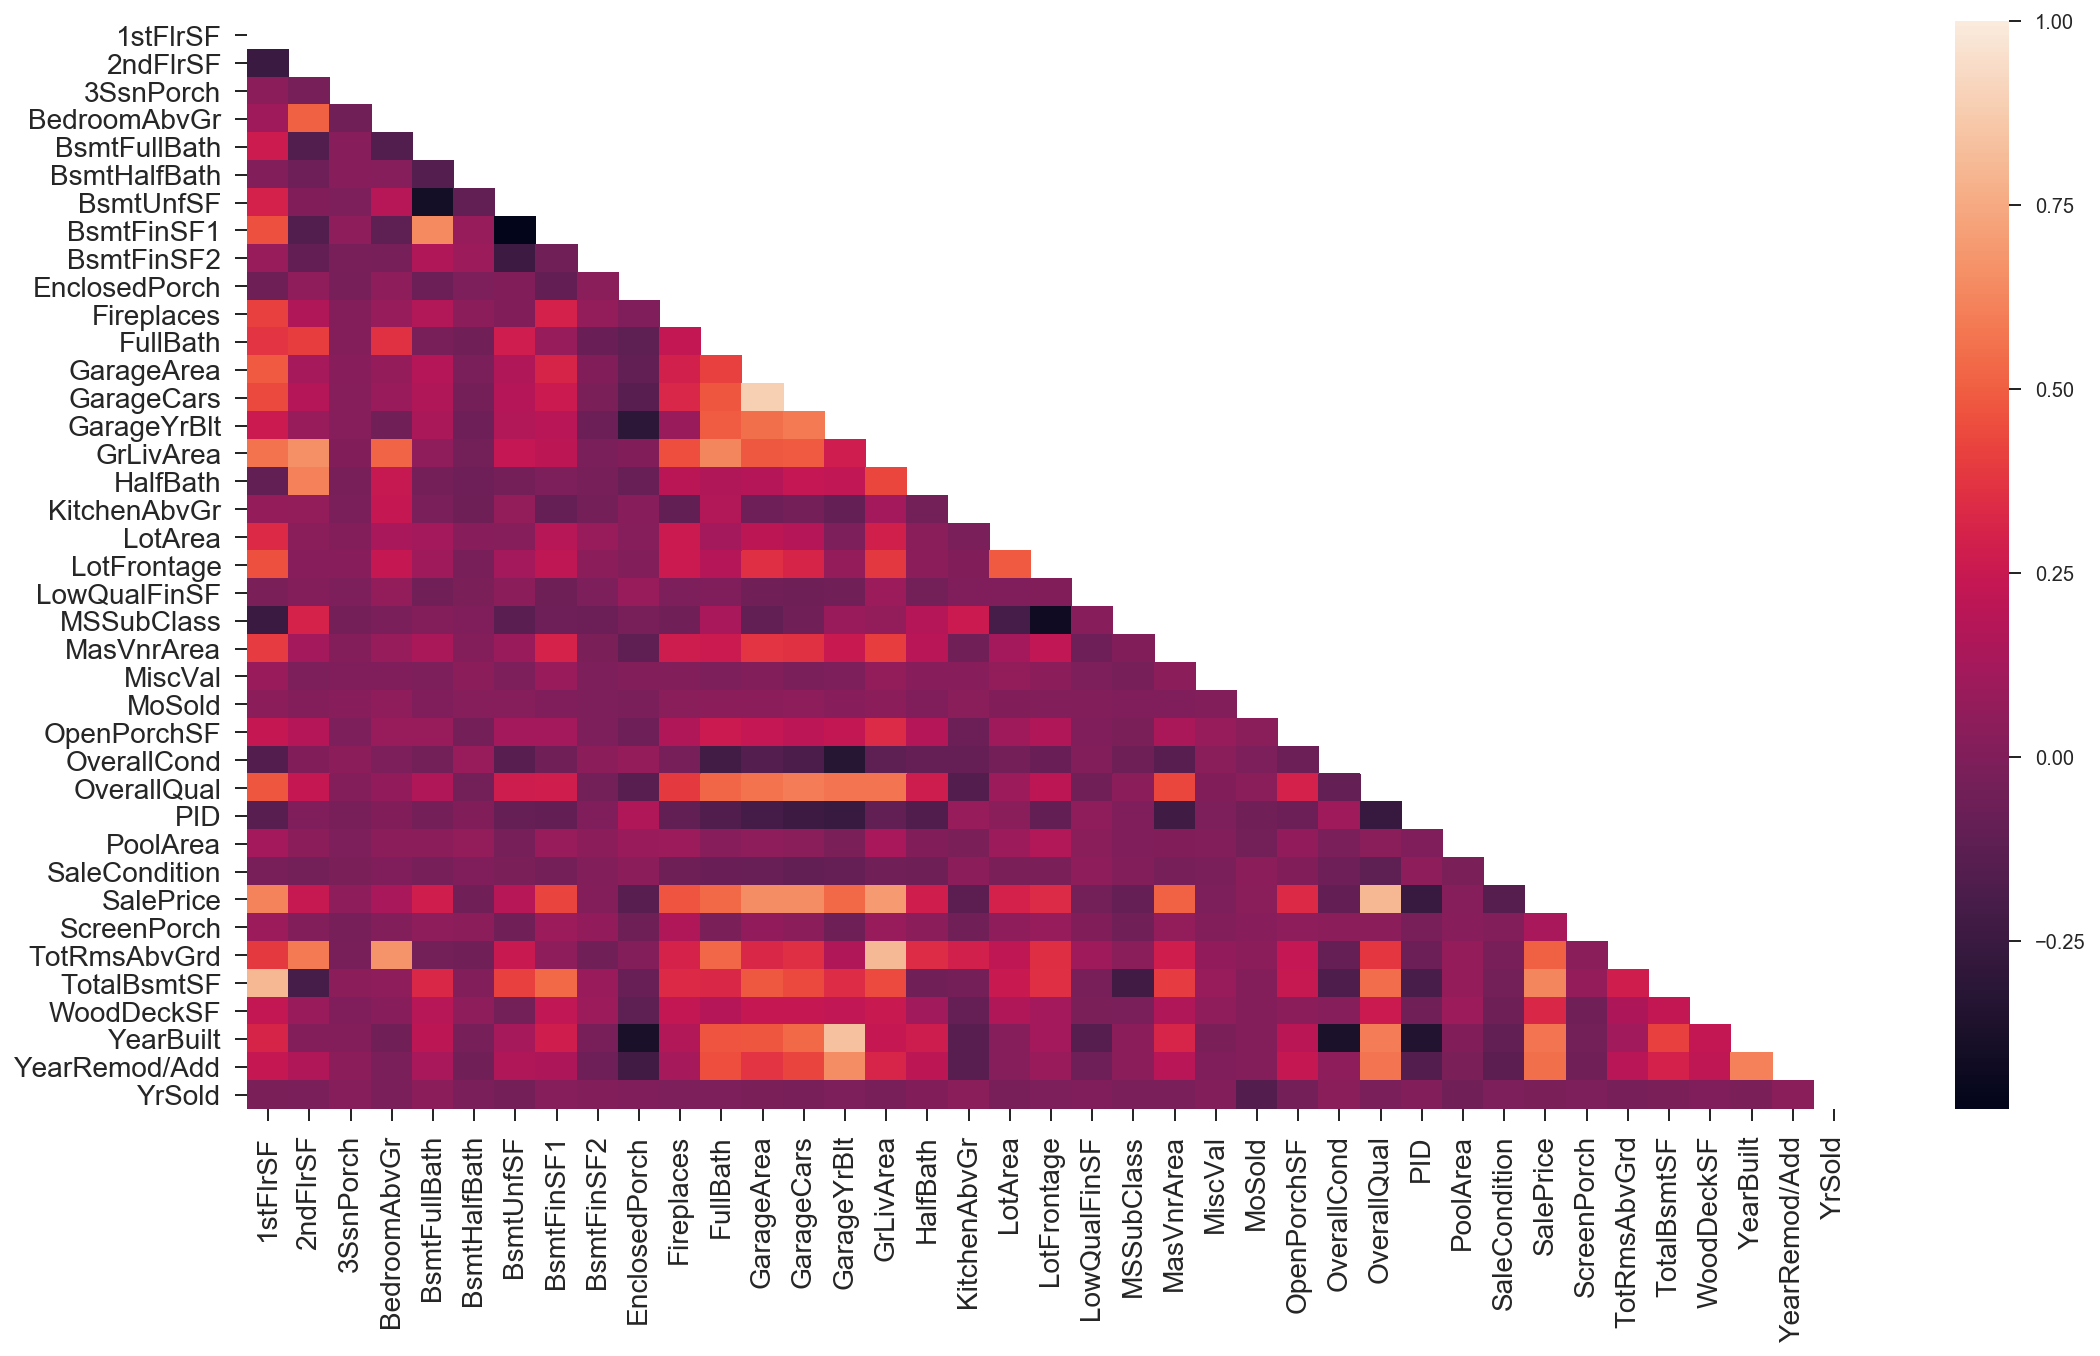

In [205]:
mean_corr = combined.drop('Id', axis=1).corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(18,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [206]:
#Missing Value imputation
#Categorical variables
combined.select_dtypes(include=['object']).columns


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [207]:
#Numerical Columns
combined.select_dtypes(include=['float64', 'int64']).columns


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PID',
       'PoolArea', 'SaleCondition', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemod/Add', 'YrSold'],
      dtype='object')

In [208]:
combined['OverallQual'].isnull().sum()

0

In [209]:
combined['CentralAir'] = combined['CentralAir'].map(lambda x: 1 if x=='Y' else 0)

In [210]:
combined['Street'] = combined['Street'].map(lambda x: 1 if x=='Pave' else 0)

In [211]:
combined['Street'].value_counts()

1    2918
0      12
Name: Street, dtype: int64

In [214]:
New_Train = combined[:2051]
X_train = New_Train.drop('SaleCondition',axis=1)
y_train = New_Train[['Id','SaleCondition']]


In [252]:
New_Test = combined[2051:]
X_test = New_Test.drop('SaleCondition',axis=1)
y_test = New_Test['SaleCondition']

In [253]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [254]:
y_test

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
849    0
850    0
851    0
852    0
853    0
854    0
855    0
856    0
857    0
858    0
859    0
860    0
861    0
862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    0
875    0
876    0
877    0
878    0
Name: SaleCondition, Length: 879, dtype: int64

In [264]:
y = y_train
X = X_train[['Id','YearBuilt','YrSold','OverallCond','OverallQual','CentralAir','LotArea','Street']]

In [265]:
X_test = X_test[['Id','YearBuilt','YrSold','OverallCond','OverallQual','CentralAir','LotArea','Street']]

In [266]:

# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print(('Fold accuracy:', acc))
        
    print(('Mean CV accuracy:', np.mean(scores)))
    return scores

In [267]:
baseline =1 - np.mean(y['SaleCondition'])
print('baseline:', baseline)

baseline: 0.9356411506582155


In [271]:
knn = KNeighborsClassifier()
knn.fit(X_test,y_test) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
predict = knn.predict(X_test)

In [272]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

####Logistic regression

In [270]:
from sklearn.linear_model import LogisticRegressionCV

Cs = np.logspace(-4, 4, 100)
lr = LogisticRegressionCV(Cs=Cs, cv=5)
lr.fit(X, y)

print(lr.C_)

ValueError: bad input shape (2051, 2)

In [105]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lr, Xs, y, cv=5))

0.93515621964350559

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dtc1 = DecisionTreeClassifier(max_depth=1)
# dtc2 = DecisionTreeClassifier(max_depth=2)
# dtc3 = DecisionTreeClassifier(max_depth=3)
# dtcN = DecisionTreeClassifier(max_depth=None)

In [108]:
dtc1.fit(X, y)
# dtc2.fit(X, y)
# dtc3.fit(X, y)
# dtcN.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, X, y, cv=4)
# dtc2_scores = cross_val_score(dtc2, X, y, cv=4)
# dtc3_scores = cross_val_score(dtc3, X, y, cv=4)
# dtcN_scores = cross_val_score(dtcN, X, y, cv=4)

print(dtc1_scores, np.mean(dtc1_scores))
# print(dtc2_scores, np.mean(dtc2_scores))
# print(dtc3_scores, np.mean(dtc3_scores))
# print(dtcN_scores, np.mean(dtcN_scores))

[ 0.93567251  0.93567251  0.93177388  0.93554688] 0.934666445846


In [276]:
score = pd.DataFrame({
        "Id": X_test["Id"],
        "Sale Condition":predict
    })

In [278]:
score.to_csv("HousePriceClassifier.csv", index=False)